In [2]:
from scipy.stats import norm
import numpy as np

In [7]:
def d1(S, k, r, sig, T, divRate = 0):
    return (np.log(S/k) + (r + (sig*sig/2))*T)/(sig * np.sqrt(T))

def derivative_price_BS(S, K, r, sig , T, divRate = 0):
    d_1 = d1(S, K , r, sig, T, divRate)
    d_2 = d_1 - sig * np.sqrt(T)
    return (S * np.exp(-divRate * T)) * norm.cdf(d_1) - K * np.exp(-r*T) *  norm.cdf(d_2)

def derivative_delta(S, K, r, sig , T, divRate = 0):
    return norm.cdf(d1(S, K , r, sig, T, divRate))

def getCash_delta(S, K , r, sig, T, divRate = 0):
    delta = derivative_delta(S, K , r, sig, T, divRate)
    return delta * S, delta

def elasticity(S, K , r, sig, T, divRate = 0):
    return S * derivative_delta(S, K , r, sig, T, divRate = 0) / derivative_price_BS(S, K , r, sig, T, divRate = 0)

In [80]:
N_OPTIONS = 1000
# portfolio : {options : , cash : , stock : ,} for writer of call
S = 60 ; K = 60 ; r = 0.08; sig = 0.3; T = 90/365;divRate = 0
stockInv, num_stocks = getCash_delta(S, K, r, sig , T, divRate )
option_price = derivative_price_BS(S, K, r, sig , T, divRate )
stockInv *= N_OPTIONS; num_stocks *= N_OPTIONS
portfolio = {"option" : -N_OPTIONS, "stock" : num_stocks, "cash" : -(stockInv - option_price * N_OPTIONS)}

In [112]:
S = 1.81
x = np.linspace(10,200,1000000)
f = lambda s , t_left : s*581.96 - 1000*derivative_price_BS(s,K,r,sig,t_left,divRate) -30779.62
y = f(x , 89/365)
f_uncovered = lambda s , t_left : -1000*derivative_price_BS(s,K,r,sig,t_left) + 1000*derivative_price_BS(60,K,r,sig,90/365) * np.exp(r * 1/365) 
y_unc = f_uncovered(x , 89/365)
y0 = f(x , 90/365)

f_delta_gamma = lambda s, k1, k2 , t1, t2 : 300.58 * s - 15131.77 * np.exp(r/365) - 1000 * derivative_price_BS(s,k1,r,sig,t1) + 900.76 * derivative_price_BS(s,k2,r,sig,t2) 
y_dg = f_delta_gamma(x , 60, 65, 89/365 , 59/365)

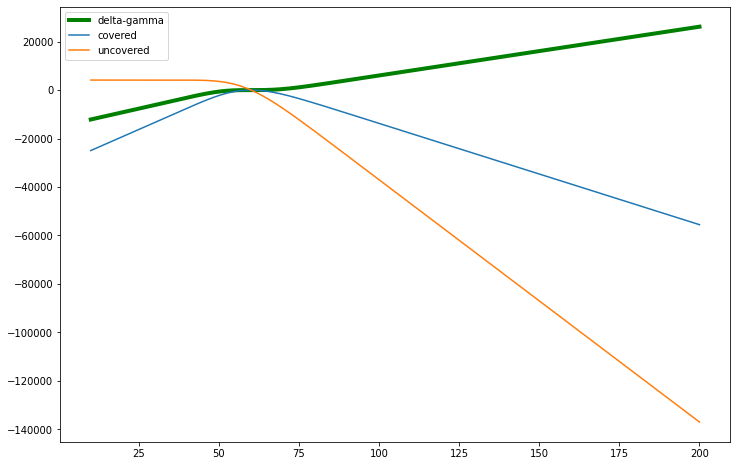

In [127]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize= (12,8))
plt.plot(x,y_dg, label = f'delta-gamma', color = 'green' , linewidth = 4)
plt.plot(x,y, label = f'covered')
plt.plot(x,y_unc, label = f'uncovered')
plt.legend()
plt.ion()
plt.show()

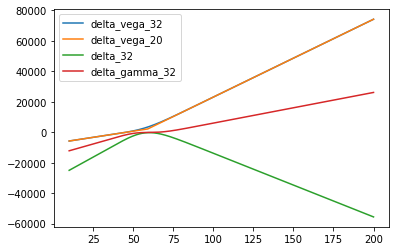

In [138]:
# delta-vega
sigg = 0.32
f_dv = lambda s , sig,  t_left : s * 159.89 - 1000 * derivative_price_BS(s,60,r,sig,t_left) - 7311.12 + 1351.15 * derivative_price_BS(s,60,r,sig,t_left)
f_d = lambda s , sig, t_left : s*581.96 - 1000*derivative_price_BS(s,60,r,sig,t_left,divRate) -30779.62
f_delta_gamma_32 = lambda s, k1, k2 , t1, t2 , sig : 300.58 * s - 15131.77 * np.exp(r/365) - 1000 * derivative_price_BS(s,k1,r,sig,t1) + 900.76 * derivative_price_BS(s,k2,r,sig,t2) 
y_dg_32 = f_delta_gamma_32(x , 60, 65, 89/365 , 59/365, sigg)
y_dv_32 = f_dv( x, sigg, 89/365)
y_dv_20 = f_dv( x, 0.000001, 89/365)
y_d_32 = f_d( x, sigg, 89/365)
plt.plot(x,y_dv_32, label = f'delta_vega_32')
plt.plot(x,y_dv_20, label = f'delta_vega_20')
plt.plot(x,y_d_32, label = f'delta_32')
plt.plot(x,y_dg_32, label = f'delta_gamma_32')
plt.legend()
plt.ion()
plt.show()

In [9]:
print(derivative_price_BS(46, 45, 0.08, 0.35 , 0.25, divRate = 0))
print(derivative_delta(46, 45, 0.08, 0.35 , 0.25, divRate = 0))
print(elasticity(46, 45, 0.08, 0.35 , 0.25, divRate = 0))

4.176700588523353
0.6283095527163836
6.919873429369246
